**Task-1:Prediction using Supervised ML**

*GRIP : The Sparks Foundation (GRIP-July2021)*

**Author -Ishan Ayus**

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd drive/MyDrive/GRIP/

[Errno 2] No such file or directory: 'drive/MyDrive/GRIP/'
/content/drive/MyDrive/GRIP


# Load the given Data

In [9]:
f=pd.read_csv("student_scores - student_scores.csv")
f.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
f.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
# Essential information from dataset
print(f.shape)
f.info()

(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
#checking whether null is present in dataset or not
f.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Visualization

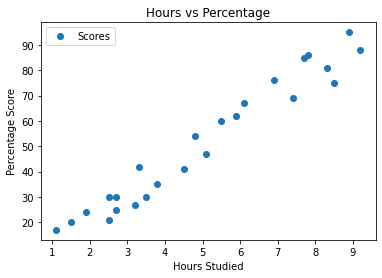

In [13]:
# The distribution of scores
f.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above figure, a positive linear relation between the percentage of score and number of hours studied is found.


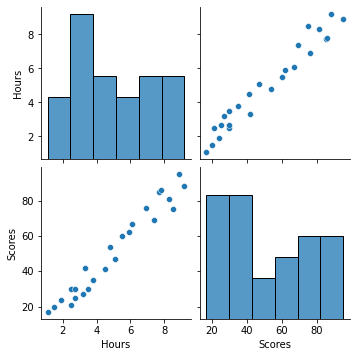

In [14]:
#pairwise relationship for the given dataset
import seaborn as sns
sns.pairplot(f)

# Splitting of data into test and train data

In [15]:
#here x= input then y= output
x = f.iloc[:, :-1].values  
y = f.iloc[:, 1].values  

In [16]:
#splitting test data = 20% and train data = 80%
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=0)

# Training the linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

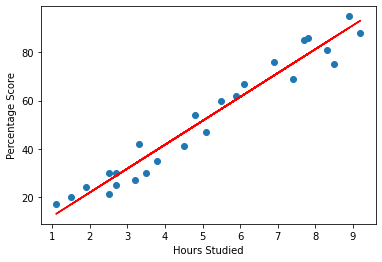

In [18]:
# The regression line
line = lin_model.coef_*x+lin_model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color='r'); 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Prediction

In [19]:
# Dataframe Comparing Actual vs Predicted
lin_pred=lin_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': lin_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


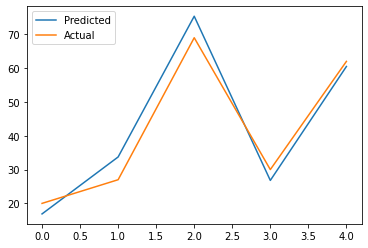

In [20]:
# Visualization of Actual vs Predicted
import matplotlib.pyplot as plt
plt.plot(lin_pred, label='Predicted')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()

In [21]:
# Evaluation for the given data
hrs =np.array(9.25) 
hrs=hrs.reshape(-1,1)
given_pred = lin_model.predict(hrs)
print("The Predicted Score for a student if he/she studies for 9.25 hours/day is = {}".format(given_pred[0]))

The Predicted Score for a student if he/she studies for 9.25 hours/day is = 93.69173248737539


# Evaluation Metrics

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
print("Root Mean Square Error",rmse_lr)

Root Mean Square Error 4.647447612100373


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(lin_pred,y_test)) 

Mean Absolute Error: 4.183859899002982


In [24]:
np.round(metrics.r2_score(lin_pred, y_test),2)

0.95